In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
for dirname, _, filenames in os.walk('/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))







/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf041.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf689.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf130.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf667.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf085.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf508.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf394.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf203.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Yellow Leaf/Yellow Leaf/Yellow Leaf1155.jpg
/kaggle/input/sugarcane-leaf-diseases/Sugarcane Leaf Dataset/Ye

In [4]:
# Display sample images


In [5]:
# Set dataset path
dataset = "/kaggle/input/sugarcane-leaf-disease/Sugarcane Leaf Dataset"
categories = os.listdir(dataset)


# Load training and validation datasets
train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    class_names=categories
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224, 224),
    seed=42,
    validation_split=0.2,
    subset="validation",
    class_names=categories
)

cat = train.class_names


Found 6748 files belonging to 11 classes.
Using 5399 files for training.
Found 6748 files belonging to 11 classes.
Using 1349 files for validation.


Image Shape: (40, 224, 224, 3)


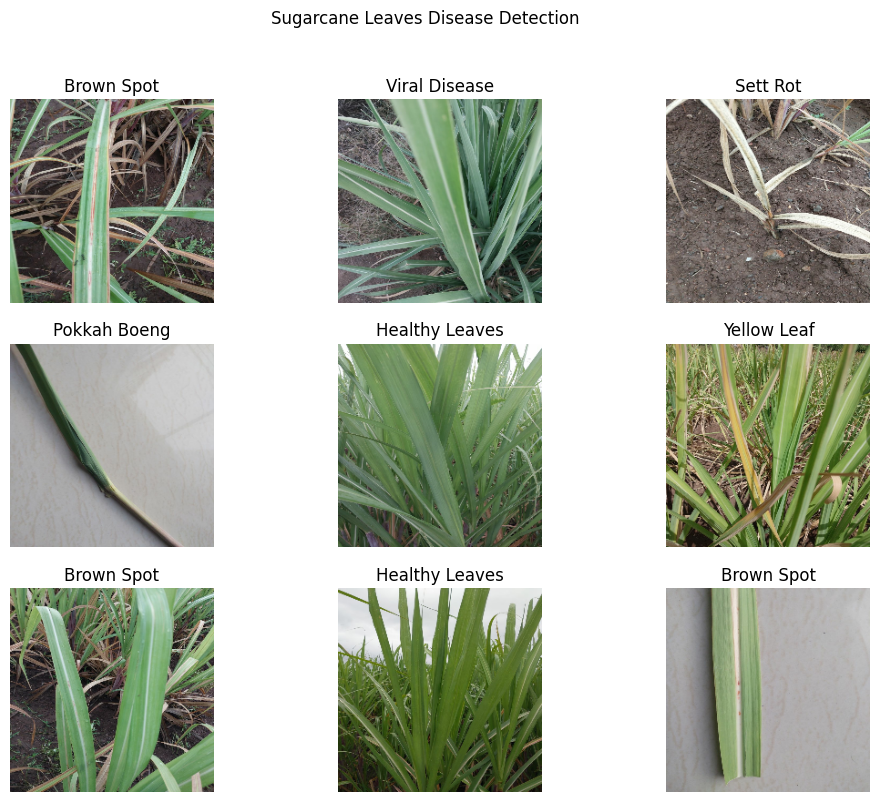

In [6]:
for example_image, example_label in train.take(1):
    break

print(f"Image Shape: {example_image.shape}")

plt.figure(figsize=(12, 9))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(cat[labels[i]])
        plt.suptitle("Sugarcane Leaves Disease Detection")
        plt.axis("off")


In [7]:
# Prepare datasets
validation_ds = test.shard(num_shards=2, index=0)
test_ds = test.shard(num_shards=2, index=1)

train_ds = train.cache().shuffle(250).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)



In [8]:
# Load EfficientNetB3 model
from tensorflow.keras.applications import EfficientNetB3

base_model = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(cat))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50


I0000 00:00:1716742996.190241    4049 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135/135 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.6675 - loss: 1.0525 - val_accuracy: 0.0926 - val_loss: 4.8429
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.9106 - loss: 0.2667 - val_accuracy: 0.0941 - val_loss: 3.2905
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 278ms/step - accuracy: 0.9349 - loss: 0.1831 - val_accuracy: 0.1015 - val_loss: 3.8264
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.8995 - loss: 0.2944 - val_accuracy: 0.5294 - val_loss: 1.6996
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.9291 - loss: 0.1803 - val_accuracy: 0.8647 - val_loss: 0.3648
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.9452 - loss: 0.1398 - val_accuracy: 0.8956 - val_loss: 0.2416
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.9453 - loss: 0.1273 - val_accuracy: 0.9397 - val_loss: 0.1746
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - accuracy: 0.9541 - loss: 0.0894 - val_a

In [9]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Calculate F1-score
from sklearn.metrics import f1_score

# Predict the labels for the test dataset
y_pred = model.predict(test_ds)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Extract true labels from the test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Calculate F1-score
test_f1_score = f1_score(y_true, y_pred_labels, average='weighted')

# Display the evaluation results
print(f'Test Loss: {test_loss:.5f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1-score: {test_f1_score * 100:.2f}%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 790ms/step - accuracy: 0.9189 - loss: 0.1929
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 627ms/step
Test Loss: 0.19175
Test Accuracy: 92.08%
Test F1-score: 91.93%


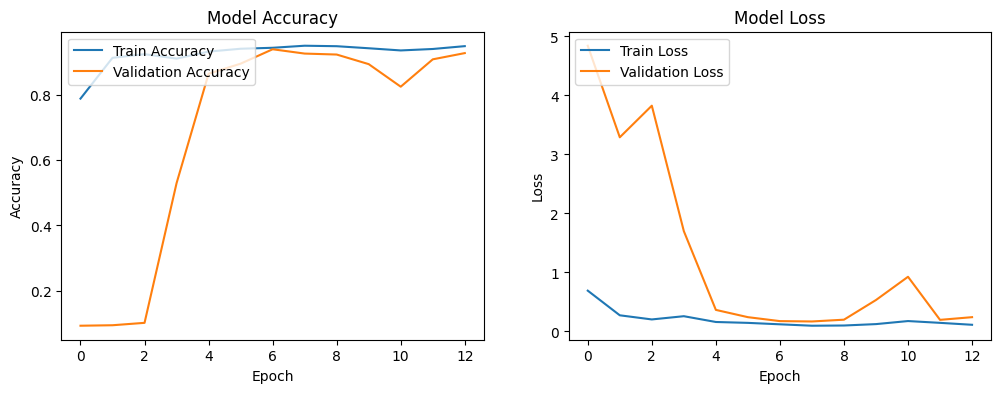

In [10]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot
plot_training_history(history)

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
from tensorflow import keras  
dataset=("/kaggle/input/sugarcane-leaf-disease/Sugarcane Leaf Dataset")
categories = os.listdir(dataset)





In [13]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224,224),
    seed=42,
    validation_split=0.2,
    subset="validation"
)
cat=train.class_names
cat


Found 6748 files belonging to 11 classes.
Using 5399 files for training.
Found 6748 files belonging to 11 classes.
Using 1349 files for validation.


['Banded Chlorosis',
 'Brown Spot',
 'BrownRust',
 'Dried Leaves',
 'Grassy shoot',
 'Healthy Leaves',
 'Pokkah Boeng',
 'Sett Rot',
 'Viral Disease',
 'Yellow Leaf',
 'smut']

In [14]:
validation_ds = test.shard(num_shards=2, index=0)
test_ds = test.shard(num_shards=2, index=1)
train_ds = train.cache().shuffle(250).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)  



from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(cat))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[early_stopping]
) 

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 205s 667ms/step - accuracy: 0.6692 - loss: 1.0487 - val_accuracy: 0.0824 - val_loss: 2.6351
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9157 - loss: 0.2300 - val_accuracy: 0.0471 - val_loss: 3.0317
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9352 - loss: 0.1705 - val_accuracy: 0.1176 - val_loss: 3.1124
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9347 - loss: 0.1578 - val_accuracy: 0.3809 - val_loss: 3.0843
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9349 - loss: 0.1407 - val_accuracy: 0.6309 - val_loss: 1.5769
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.9387 - loss: 0.1455 - val_accuracy: 0.7544 - val_loss: 0.7550
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9312 - loss: 0.1494 - val_accuracy: 0.8618 - val_loss: 0.4453
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9346 - loss: 

In [16]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Calculate F1-score
from sklearn.metrics import f1_score

# Predict the labels for the test dataset
y_pred = model.predict(test_ds)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Extract true labels from the test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Calculate F1-score
test_f1_score = f1_score(y_true, y_pred_labels, average='weighted')

# Display the evaluation results
print(f'Test Loss: {test_loss:.5f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1-score: {test_f1_score * 100:.2f}%')

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 574ms/step - accuracy: 0.9322 - loss: 0.1435
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 526ms/step
Test Loss: 0.14205
Test Accuracy: 94.17%
Test F1-score: 94.15%


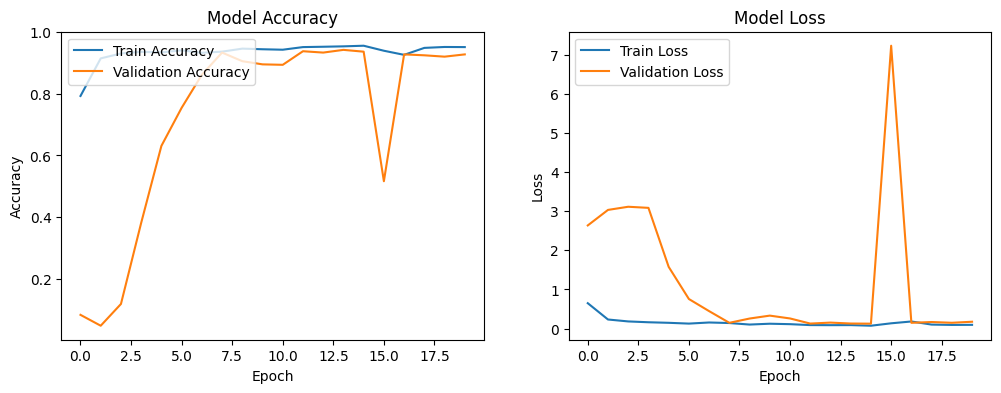

In [17]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot
plot_training_history(history)

In [23]:
#MOBILENET

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Path to dataset
dataset = "/kaggle/input/sugarcane-leaf-disease/Sugarcane Leaf Dataset"

# Load categories
categories = os.listdir(dataset)

# Load training data with augmentation
train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    labels="inferred",
    batch_size=40,
    image_size=(224,224),
    seed=42,
    validation_split=0.2,
    subset="validation"
)
# Get class names
cat = train.class_names
print(cat)


# Prefetching to optimize performance
train_ds = train.cache().shuffle(250).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Define the model with MobileNet
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(cat))
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[early_stopping]
)




Found 6748 files belonging to 11 classes.
Using 5399 files for training.
Found 6748 files belonging to 11 classes.
Using 1349 files for validation.
['Banded Chlorosis', 'Brown Spot', 'BrownRust', 'Dried Leaves', 'Grassy shoot', 'Healthy Leaves', 'Pokkah Boeng', 'Sett Rot', 'Viral Disease', 'Yellow Leaf', 'smut']
Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 59s 197ms/step - accuracy: 0.5603 - loss: 1.4427 - val_accuracy: 0.7954 - val_loss: 0.7248
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8708 - loss: 0.4091 - val_accuracy: 0.8562 - val_loss: 0.4308
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9092 - loss: 0.2857 - val_accuracy: 0.9274 - val_loss: 0.2135
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.9219 - loss: 0.2132 - val_accuracy: 0.8895 - val_loss: 0.3733
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.9300 - loss: 0.1966 - val_accuracy: 0.8940 - val_loss: 0.3858
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━

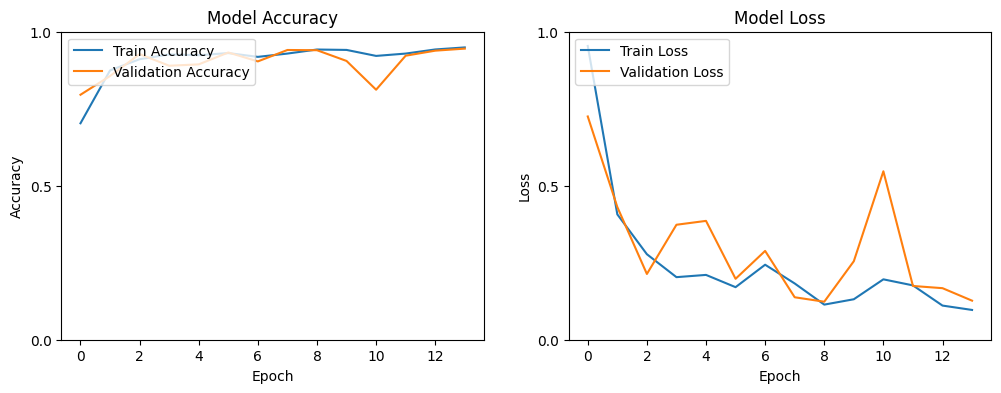

In [24]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.yticks(np.arange(0, 1.1, 0.5))  # Adjusting y-axis ticks to increase by 0.5

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.yticks(np.arange(0, 1.1, 0.5))  # Adjusting y-axis ticks to increase by 0.5

    plt.show()

# Call the function to plot
plot_training_history(history)

In [13]:
test_loss, test_accuracy = model.evaluate(test_ds)

# Calculate F1-score
from sklearn.metrics import f1_score

# Predict the labels for the test dataset
y_pred = model.predict(test_ds)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Extract true labels from the test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Calculate F1-score
test_f1_score = f1_score(y_true, y_pred_labels, average='weighted')

# Display the evaluation results
print(f'Test Loss: {test_loss:.5f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1-score: {test_f1_score * 100:.2f}%')

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9345 - loss: 0.1358
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step
Test Loss: 0.14325
Test Accuracy: 93.55%
Test F1-score: 93.52%


In [21]:
# Define the model with MobileNet with base model keeping false
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(cat),activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=50,
    callbacks=[early_stopping]
)




Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.4408 - loss: 1.6932 - val_accuracy: 0.8065 - val_loss: 0.6425
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7457 - loss: 0.7361 - val_accuracy: 0.8784 - val_loss: 0.4307
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8203 - loss: 0.5273 - val_accuracy: 0.8962 - val_loss: 0.3142
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8691 - loss: 0.3993 - val_accuracy: 0.8999 - val_loss: 0.2755
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8803 - loss: 0.3540 - val_accuracy: 0.9162 - val_loss: 0.2187
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9046 - loss: 0.2856 - val_accuracy: 0.9066 - val_loss: 0.2143
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9080 - loss: 0.2591 - val_accuracy: 0.9281 - val_loss: 0.1764
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9224 - loss: 0.2215 - val_accuracy: 0.93

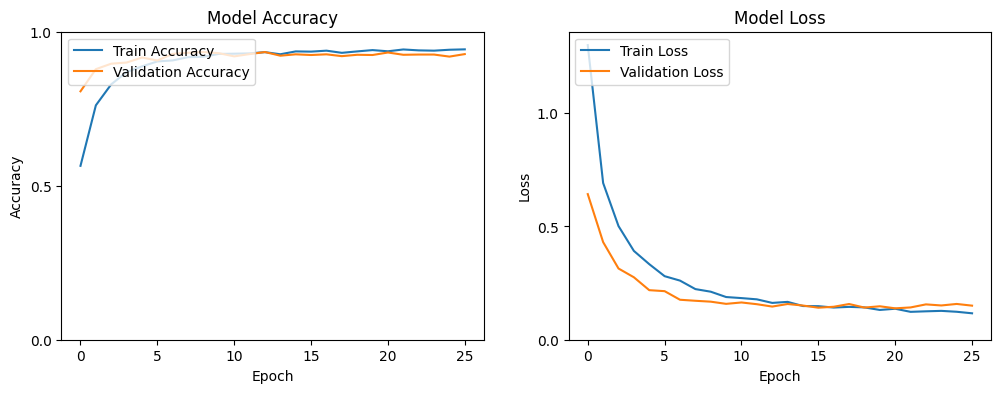

In [22]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.yticks(np.arange(0, 1.1, 0.5))  # Adjusting y-axis ticks to increase by 0.5

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.yticks(np.arange(0, 1.1, 0.5))  # Adjusting y-axis ticks to increase by 0.5

    plt.show()

# Call the function to plot
plot_training_history(history)

In [23]:
test_loss, test_accuracy = model.evaluate(test_ds)

# Calculate F1-score
from sklearn.metrics import f1_score

# Predict the labels for the test dataset
y_pred = model.predict(test_ds)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Extract true labels from the test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Calculate F1-score
test_f1_score = f1_score(y_true, y_pred_labels, average='weighted')

# Display the evaluation results
print(f'Test Loss: {test_loss:.5f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1-score: {test_f1_score * 100:.2f}%')

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9372 - loss: 0.1216
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step
Test Loss: 0.13851
Test Accuracy: 93.25%
Test F1-score: 93.24%
